<a href="https://colab.research.google.com/github/arfin-arif/ml/blob/main/bengali_digit's_clasification_using_ann_and_cnn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip "/content/bengali_digits.zip" -d "/content/rawdata"

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/pixel_values_and_labels_new.csv")
df

,Label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,...,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,8,251,252,1,247,249,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,3,235,250,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,174,142,0,4,83,251,250,254,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,252,148,16,7,0,75,177,254,255,251,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,254,254,254,254,249,250,254,255,250,252,254,253,254,255,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,253,251,252,1,0,2,70,176,253,255,...,255,255,255,255,255,255,255,255,255,255,255,253,255,255,253,255,255,0,3,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,252,254,255,254,6,0,239,253,255
2,9,255,255,255,255,254,255,250,253,253,255,254,248,252,253,254,255,254,254,254,253,253,255,255,255,255,255,255,255,255,253,255,254,255,255,253,253,253,255,254,254,255,252,255,255,255,255,255,255,255,...,255,255,255,255,255,255,249,143,0,5,1,173,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,250,0,255,255,253,255,255,255,255,255,255,255,255,255,255
3,0,255,254,255,255,255,255,254,254,254,253,255,254,251,254,254,254,254,255,254,254,254,254,254,254,255,255,255,255,255,255,255,253,252,255,249,252,254,255,240,130,4,81,228,255,254,251,255,254,255,...,251,33,12,2,1,2,0,1,1,1,1,1,1,1,12,166,252,254,254,254,255,253,254,253,254,254,254,250,255,254,255,123,28,16,1,4,0,4,4,32,31,244,255,255,255,251,254,254,254,255
4,0,255,255,255,255,255,254,254,254,255,255,254,253,254,254,255,255,255,254,255,255,255,254,255,255,255,255,255,255,255,255,255,255,254,250,255,254,254,251,245,0,1,0,0,0,3,4,251,245,253,...,252,255,254,254,251,255,251,240,10,7,5,2,8,3,255,252,255,254,255,253,254,255,254,255,254,253,253,254,246,254,254,254,254,255,253,254,255,254,255,254,254,253,254,253,253,254,254,254,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,5,252,255,253,252,255,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,3,248,255,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,254,255,252,144,2,5,0,3,101,192,105,1,8,1,38,164,254,251,255,254,255,255,255,255,255,255,255,255,255,253,254,255,255,52,0,4,1,0,0,3,70,165,255,252,251,253,255,254
15616,8,255,255,255,255,255,255,255,255,255,255,248,9,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,252,185,0,249,252,255,255,255,255,255,255,255,...,255,255,255,255,254,251,3,2,154,255,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,249,5,151,255,255,255,255,255,255,255,255,255,255,255,255,255,255
15617,1,252,252,255,251,255,249,248,255,252,254,253,253,252,252,253,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,2,6,157,252,252,255,254,254,253,253,254,254,254,255,255,255,255,255,...,255,179,0,3,2,0,1,0,4,2,160,251,255,252,248,255,254,254,255,255,255,255,255,255,255,254,252,255,250,184,0,6,1,1,161,168,255,254,255,251,255,252,250,255,254,254,255,255,255,255
15

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(12496, 784)

In [ ]:
X_train[0].shape

(784,)

In [ ]:
y_train[:5]

array([2, 3, 1, 9, 4])

In [ ]:
index=502
label = y_train[index]
image = np.reshape(X_train[index], (28, 28))
image.shape

(28, 28)

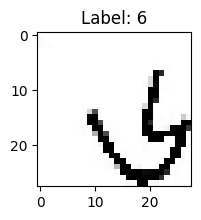

In [ ]:
plt.figure(figsize=(15,2))
plt.title(f"Label: {label}")
plt.imshow(image, cmap='gray')

In [ ]:
X_train[0]

In [ ]:
num_samples, num_features = X_train.shape
image_size = int(np.sqrt(num_features))
X_train = X_train.reshape(num_samples, image_size, image_size)
X_train =  X_train / 255.0
X_train.shape

(12496, 28, 28)

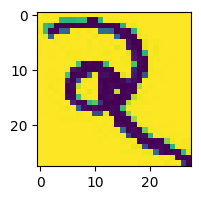

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [ ]:
num_samples, num_features = X_test.shape
image_size = int(np.sqrt(num_features))
X_test = X_test.reshape(num_samples, image_size, image_size)
X_test = X_test / 255.0


In [ ]:
X_test.shape

(3124, 28, 28)

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train,y_train, epochs=5)

Epoch 1/5
391/391 [==============================] - 18s 45ms/step - loss: 0.8751 - accuracy: 0.7523
Epoch 2/5
391/391 [==============================] - 16s 41ms/step - loss: 0.5568 - accuracy: 0.8344
Epoch 3/5
391/391 [==============================] - 16s 41ms/step - loss: 0.5007 - accuracy: 0.8489
Epoch 4/5
391/391 [==============================] - 16s 41ms/step - loss: 0.4681 - accuracy: 0.8568
Epoch 5/5
391/391 [==============================] - 16s 41ms/step - loss: 0.4429 - accuracy: 0.8650


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

98/98 [==============================] - 1s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       329
           1       0.89      0.88      0.88       318
           2       0.89      0.87      0.88       320
           3       0.88      0.83      0.85       318
           4       0.86      0.94      0.90       278
           5       0.85      0.84      0.84       337
           6       0.80      0.86      0.83       299
           7       0.93      0.89      0.91       283
           8       0.74      0.95      0.83       325
           9       0.88      0.70      0.78       317

    accuracy                           0.86      3124
   macro avg       0.87      0.86      0.86      3124
weighted avg       0.87      0.86      0.86      3124



In [ ]:
from keras import models, layers


X_train = X_train.reshape(-1, image_size, image_size, 1)


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
391/391 [==============================] - 14s 32ms/step - loss: 0.6341 - accuracy: 0.8017
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2583 - accuracy: 0.9154
Epoch 3/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1798 - accuracy: 0.9417
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1381 - accuracy: 0.9546
Epoch 5/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1066 - accuracy: 0.9651
Epoch 6/10
391/391 [==============================] - 12s 29ms/step - loss: 0.0820 - accuracy: 0.9726
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.0543 - accuracy: 0.9830
Epoch 8/10
391/391 [==============================] - 12s 32ms/step - loss: 0.0484 - accuracy: 0.9841
Epoch 9/10
391/391 [==============================] - 12s 32ms/step - loss: 0.0397 - accuracy: 0.9870
Epoch 10/10
391/391 [==============================] - 13s 33ms/step - loss: 0.028

In [ ]:
X_test = X_test.reshape(-1, image_size, image_size, 1)
cnn.evaluate(X_test,y_test)

98/98 [==============================] - 1s 8ms/step - loss: 0.1893 - accuracy: 0.9504


[0.1892714649438858, 0.9503841400146484]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

98/98 [==============================] - 1s 10ms/step


array([[2.2375775e-10, 1.5636132e-21, 9.4119472e-18, 9.9999994e-01,
        4.6912170e-12, 1.7744352e-08, 1.7482686e-08, 8.7398486e-14,
        3.1319710e-15, 2.4069171e-20],
       [1.4711342e-11, 5.1090632e-10, 1.9964743e-08, 3.9081754e-12,
        9.9999768e-01, 2.7825260e-07, 1.7252657e-15, 1.9791532e-06,
        1.2326034e-12, 3.8879735e-09],
       [6.4016426e-16, 2.6100287e-15, 7.2608144e-18, 7.4797822e-07,
        2.1965296e-17, 1.4587611e-11, 2.4391313e-09, 1.6435887e-16,
        9.9999923e-01, 3.0249042e-15],
       [3.0710623e-13, 3.6714138e-08, 7.6804967e-16, 3.2296644e-23,
        5.5538150e-15, 8.9027621e-18, 3.5907638e-32, 1.3796872e-16,
        1.5206962e-19, 9.9999994e-01],
       [7.5261156e-15, 6.4618593e-15, 3.4441968e-22, 2.2582929e-08,
        4.2187030e-18, 1.5267833e-10, 2.9290301e-10, 1.6698850e-18,
        9.9999994e-01, 4.2868939e-15]], dtype=float32)

In [171]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 4, 8, 9, 8]

In [172]:
y_test[:5]

array([3, 4, 8, 9, 8])

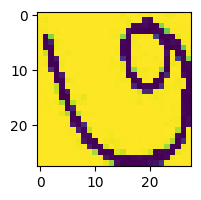

In [175]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[0])